# **Mini Project on NLP Applications**
This mini-project consolidates all concepts learned throughout the NLP course. Students are
expected to design a complete NLP pipeline addressing a real-world problem such as
sentiment analysis, fake news detection, chatbot design, or text summarization.

In [1]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

nltk.download("punkt")
nltk.download("wordnet")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

# TASK 1: PROJECT PROPOSAL (Problem + Dataset)

In [2]:
# Example dataset (Sentiment Analysis dataset)
data = {
    "text": [
        "I love this product, it is amazing!",
        "Worst experience ever. I hate it.",
        "Very good performance, I am happy.",
        "Terrible service, not recommended.",
        "Absolutely fantastic!",
        "Bad quality and bad support.",
        "This is wonderful to use.",
        "I am disappointed with the item."
    ],
    "label": [1, 0, 1, 0, 1, 0, 1, 0]  # 1 = positive, 0 = negative
}

In [3]:
df = pd.DataFrame(data)

print("Sample Dataset:")
print(df)

Sample Dataset:
                                  text  label
0  I love this product, it is amazing!      1
1    Worst experience ever. I hate it.      0
2   Very good performance, I am happy.      1
3   Terrible service, not recommended.      0
4                Absolutely fantastic!      1
5         Bad quality and bad support.      0
6            This is wonderful to use.      1
7     I am disappointed with the item.      0


# TASK 2: SYSTEM DESIGN & IMPLEMENTATION

In [6]:
# 1. Text Preprocessing Functions
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

def preprocess_text(text):
    # Tokenization
    tokens = nltk.word_tokenize(text.lower())

    # Remove stopwords + lemmatization
    cleaned = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]

    return "".join(cleaned)

# Apply preprocessing
df["cleaned_text"] = df["text"].apply(preprocess_text)

print("\nCleaned Text:")
print(df[["text", "cleaned_text"]])


Cleaned Text:
                                  text                cleaned_text
0  I love this product, it is amazing!          loveproductamazing
1    Worst experience ever. I hate it.     worstexperienceeverhate
2   Very good performance, I am happy.        goodperformancehappy
3   Terrible service, not recommended.  terribleservicerecommended
4                Absolutely fantastic!         absolutelyfantastic
5         Bad quality and bad support.        badqualitybadsupport
6            This is wonderful to use.                wonderfuluse
7     I am disappointed with the item.            disappointeditem


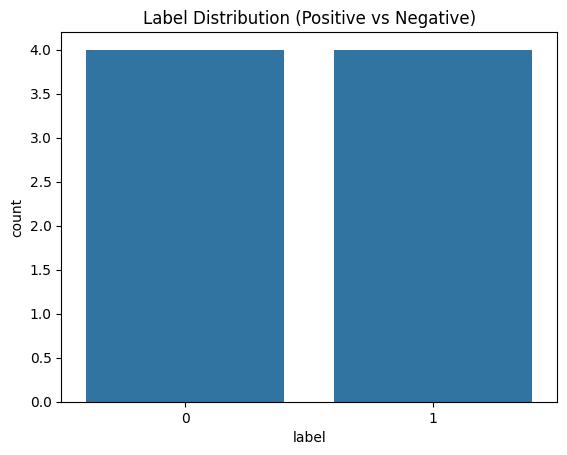

In [7]:
# 2. TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["cleaned_text"])
y = df["label"]

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 4. Model Training (Logistic Regression)
model = LogisticRegression()
model.fit(X_train, y_train)

# 5. Visualization (Simple Count Plot)
sns.countplot(x=df["label"])
plt.title("Label Distribution (Positive vs Negative)")
plt.show()


# TASK 3: EVALUATION & DISCUSSION


Accuracy: 0.0

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       2.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

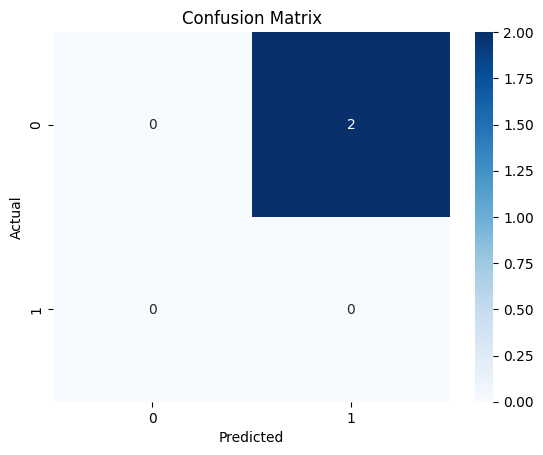

In [8]:
# Predictions
y_pred = model.predict(X_test)

# Metrics
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [9]:
# TASK 4: REPORT & PRESENTATION

print("\nModel Pipeline Completed Successfully!")


Model Pipeline Completed Successfully!
